# Machine Learning: Regression

### Within this document
#### 1. Importing a new library for regression and data
#### 2. Data cleaning

## 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
#new library for regression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
mainPath = r'C:\Users\chloe\Documents\Documents\Documents\Career Foundry\Data Immersion'

In [3]:
df = pd.read_csv(os.path.join(mainPath, 'Achievement 6', '6.1 Cleaned Sourcing Data_deBeus.csv'))

## 2. Data cleaning

In [4]:
df.columns

Index(['State', 'County', 'alcoholInvolvementDrivingDeaths',
       'alcoholInvolvementDrivingDeathsRate', 'severeHousingProblemsRate',
       'housingCostBurdenRate', 'housingOvercrowdingRate',
       'Inadequate Facilities', 'driveAloneToWorkRate',
       'householdsWithBroadbandAccess', 'householdsWithBroadbandAccessRate',
       'alcoholDrivingDeathsRateCategory', 'housingProblemsRateCategory',
       'broadbandAccessRateCategory'],
      dtype='object')

In [16]:
#renaming columns
df.rename(columns = {'alcoholInvolvementDrivingDeaths':'N alcohol driving deaths', 'alcoholInvolvementDrivingDeathsRate':'R alcohol driving deaths', 
                     'severeHousingProblemsRate':'R housing problems', 'housingCostBurdenRate':'R cost burden', 'housingOvercrowdingRate':'R overcrowding', 
                     'Inadequate Facilities':'R inadequate facilities', 'driveAloneToWorkRate':'R drive alone', 
                     'householdsWithBroadbandAccess':'N broadband access', 'householdsWithBroadbandAccessRate':'R broadband access', 
                     'alcoholDrivingDeathsRateCategory':'categorical alcohol deaths R', 'housingProblemsRateCategory':'categorical housing R', 
                     'broadbandAccessRateCategory':'categorical broadband access R'}, inplace = True)

In [17]:
df.dtypes

State                              object
County                             object
N alcohol driving deaths          float64
R alcohol driving deaths          float64
R housing problems                float64
R cost burden                     float64
R overcrowding                    float64
R inadequate facilities           float64
R drive alone                     float64
N broadband access                float64
R broadband access                float64
categorical alcohol deaths R      float64
categorical housing R             float64
categorical broadband access R    float64
dtype: object

In [68]:
#we need to change the float from numbers to numerical
convertColumns = ['N alcohol driving deaths', 'N broadband access']
df[convertColumns] = df[convertColumns].apply(pd.to_numeric, errors = 'coerce')

In [69]:
df.dtypes

State                              object
County                             object
N alcohol driving deaths            int64
R alcohol driving deaths          float64
R housing problems                float64
R cost burden                     float64
R overcrowding                    float64
R inadequate facilities           float64
R drive alone                     float64
N broadband access                  int64
R broadband access                float64
categorical alcohol deaths R      float64
categorical housing R             float64
categorical broadband access R    float64
dtype: object

In [18]:
#missing values
df.isnull().sum()

State                              1
County                             0
N alcohol driving deaths          78
R alcohol driving deaths          78
R housing problems                51
R cost burden                     51
R overcrowding                    51
R inadequate facilities           51
R drive alone                     51
N broadband access                51
R broadband access                51
categorical alcohol deaths R      78
categorical housing R             51
categorical broadband access R    51
dtype: int64

In [19]:
median = df.median()
median

C:\Users\chloe\AppData\Local\Temp\ipykernel_20452\1236989899.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


N alcohol driving deaths             7.000000
R alcohol driving deaths            26.562500
R housing problems                  12.576985
R cost burden                        9.796910
R overcrowding                       1.880878
R inadequate facilities              0.956768
R drive alone                       79.815668
N broadband access                7914.000000
R broadband access                  81.689511
categorical alcohol deaths R         2.000000
categorical housing R                1.000000
categorical broadband access R       1.000000
dtype: float64

In [20]:
mean = df.mean()
mean

C:\Users\chloe\AppData\Local\Temp\ipykernel_20452\2523297653.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


N alcohol driving deaths             31.827343
R alcohol driving deaths             27.485409
R housing problems                   13.051223
R cost burden                        20.367270
R overcrowding                        4.834478
R inadequate facilities               2.450829
R drive alone                        78.570105
N broadband access                68654.423163
R broadband access                   80.541443
categorical alcohol deaths R          1.478819
categorical housing R                 1.494750
categorical broadband access R        1.499841
dtype: float64

Since the median is lower in many of the columns, I am assuming there are a lot of outliers that are impacting the mean. Therefore, I will insert the median into the missing values.

In [21]:
df.fillna(median, inplace = True)

In [22]:
df.isnull().sum()

State                             1
County                            0
N alcohol driving deaths          0
R alcohol driving deaths          0
R housing problems                0
R cost burden                     0
R overcrowding                    0
R inadequate facilities           0
R drive alone                     0
N broadband access                0
R broadband access                0
categorical alcohol deaths R      0
categorical housing R             0
categorical broadband access R    0
dtype: int64

In [28]:
print(df['State'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
3189    False
3190    False
3191    False
3192    False
3193     True
Name: State, Length: 3194, dtype: bool


In [29]:
df.drop(3193)

,State,County,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
0,Alabama,Alabama,7.0,26.562500,12.576985,9.796910,1.880878,0.956768,79.815668,7914.0,81.689511,2.0,1.0,1.0
1,Alabama,Autauga,18.0,32.100000,14.400000,12.600000,1.100000,1.600000,86.400000,18679.0,85.500000,2.0,2.0,2.0
2,Alabama,Baldwin,57.0,32.200000,12.200000,10.600000,1.300000,0.600000,81.400000,76602.0,87.900000,2.0,1.0,2.0
3,Alabama,Barbour,12.0,37.500000,16.200000,13.500000,3.900000,0.600000,83.100000,5872.0,64.600000,2.0,2.0,1.0
4,Alabama,Bibb,6.0,21.400000,11.300000,8.000000,1.200000,2.200000,87.000000,5284.0,74.600000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,Wyoming,Sweetwater,11.0,18.333333,10.370370,8.224543,2.022544,0.611916,76.782157,13730.0,88.415223,1.0,1.0,2.0
3189,Wyoming,Teton,2.0,18.181818,15.410200,10.016694,5.820399,1.995565,65.119945,8622.0,90.462701,1.0,2.0,2.0
3190,Wyoming,Uinta,4.0,17.391304,8.689928,5.756359,2.962475,0.394997,79.221320,6957.0,90.644951,1.0,1.0,2.0
3191,Wyoming,Washakie,0.0,0.000000,7.280832,5.688351,2.080238,0.297177,81.076843,2879.0,85.430267,0.0,1.0,2.0


#### Duplicates check

In [30]:
dups = df.duplicated()
dups.shape

(3194,)

#### Extreme values checks

C:\Users\chloe\AppData\Local\Temp\ipykernel_20452\2956894540.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R broadband access'], bins = 25)


<Axes: xlabel='R broadband access', ylabel='Density'>

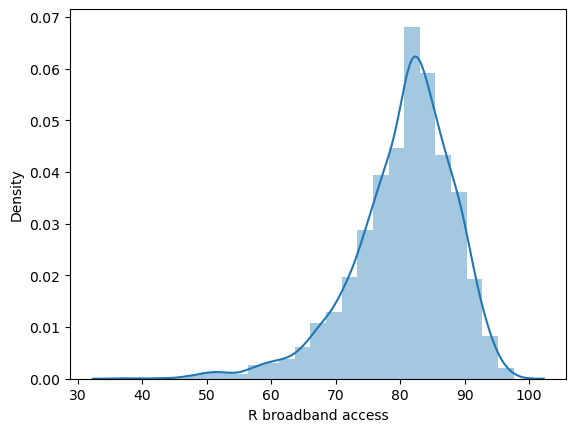

In [31]:
sns.distplot(df['R broadband access'], bins = 25)

### 3. Data prep for regression analysis

<Figure size 800x600 with 0 Axes>

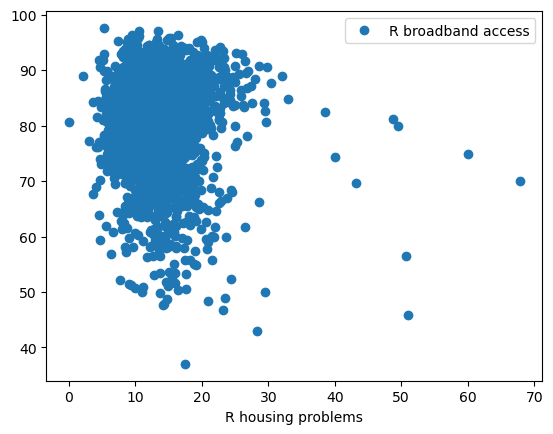

In [108]:
plt.figure(figsize=(8,6)),
df.plot(x = 'R housing problems', y = 'R broadband access', style = 'o')
plt.show()

## Part Six: reshape into arrays

In [109]:
x = df['R housing problems'].values.reshape(-1,1)
y = df['R broadband access'].values.reshape(-1,1)

In [110]:
x

array([[12.57698541],
       [14.4       ],
       [12.2       ],
       ...,
       [ 7.2808321 ],
       [12.28373702],
       [13.05131167]])

In [111]:
y

array([[81.68951132],
       [85.5       ],
       [87.9       ],
       ...,
       [85.43026706],
       [81.29992738],
       [80.54148098]])

## Part Seven: Split into sets

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Part Eight: Linear regression

In [113]:
regression = LinearRegression()

In [114]:
#fit the regression to the training data, which will be used to train the model
regression.fit(x_train, y_train)

LinearRegression()

In [115]:
#it will create y-values based on the x value, and we can see how accurate the model is
y_predicted = regression.predict(x_test)

Prediction: I don't think there will be a high r squared because of the original lack of correlation between these two variables. 

## Step Nine: Plot linear regression

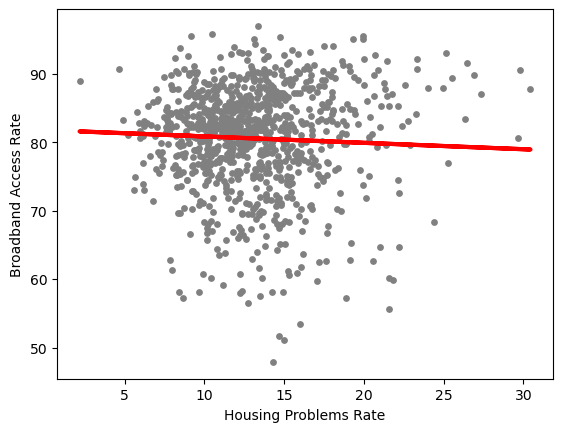

In [116]:
plot_test = plt
plot_test.scatter(x_test, y_test, color = 'gray', s = 15)
plot_test.plot(x_test, y_predicted, color = 'red', linewidth = 3)
plot_test.xlabel('Housing Problems Rate')
plot_test.ylabel('Broadband Access Rate')
plot_test.show()

## Step Ten: Interpretation

The line fits the data relatively well. Because of some of the variance in the lower access rates, I'd think the negative regression would be a bit sharper...

## Step Eleven: Check performance stats

In [117]:
#objects that contain model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [118]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R squared score: ', r2)
# very small relationship between housing problems causing broadband access problems

Slope:  [[-0.09350734]]
Mean squared error:  58.73475852389015
R squared score:  -0.005314645411490293


In [119]:
y_predicted

array([[81.00078865],
       [80.85065206],
       [80.35368745],
       [80.61360457],
       [80.63613577],
       [80.3250839 ],
       [80.88358859],
       [80.77543193],
       [79.88903624],
       [80.49141064],
       [80.08623795],
       [80.5926322 ],
       [80.71944935],
       [81.10248681],
       [80.48786792],
       [80.50458043],
       [80.4366884 ],
       [80.70174108],
       [81.10455464],
       [80.39583852],
       [80.83116711],
       [80.73322659],
       [80.49876935],
       [80.09635198],
       [80.76044747],
       [80.76766051],
       [80.44756039],
       [79.80785383],
       [80.71730402],
       [80.37437134],
       [80.47282759],
       [80.43237416],
       [80.23288886],
       [80.52519816],
       [80.08036383],
       [80.70251027],
       [80.63162132],
       [80.59435595],
       [80.63379221],
       [80.78712333],
       [79.64479494],
       [81.06232298],
       [80.40003022],
       [80.80943172],
       [80.92898908],
       [80

## Step Twelve: Compare predicted with actual

In [120]:
data = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,75.207297,81.000789
1,82.121212,80.850652
2,74.988852,80.353687
3,69.540769,80.613605
4,74.635569,80.636136
5,88.304882,80.325084
6,90.017896,80.883589
7,78.397802,80.775432
8,71.899902,79.889036
9,93.410019,80.491411


In [121]:
y_predicted_train = regression.predict(x_train)
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [122]:
print('slope:', regression.coef_)
print('Mean squared error:', rmse_train)
print('R squared score:', r2_train)

slope: [[-0.09350734]]
Mean squared error: 62.231379435019036
R squared score: 0.0028915403669149686


# Step Thirteen: Model performance

I am not going to lie, I am a bit confused on model performance and how it relates to what the purpose of machine learning is. I will leave more clarity of my confusion in the text box of turning the project in.

# Appendix: Other dataset

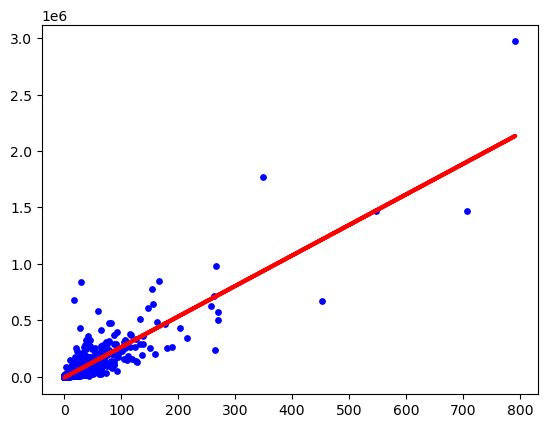

In [100]:
plot_test = plt
plot_test.scatter(x_train, y_train, color='blue', s =15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth=3)
plot_test.show()

### Let's do a different relationship

In [50]:
df.columns

Index(['State', 'County', 'N alcohol driving deaths',
       'R alcohol driving deaths', 'R housing problems', 'R cost burden',
       'R overcrowding', 'R inadequate facilities', 'R drive alone',
       'N broadband access', 'R broadband access',
       'categorical alcohol deaths R', 'categorical housing R',
       'categorical broadband access R'],
      dtype='object')

In [58]:
df.dtypes

State                              object
County                             object
N alcohol driving deaths            int32
R alcohol driving deaths          float64
R housing problems                float64
R cost burden                     float64
R overcrowding                    float64
R inadequate facilities           float64
R drive alone                     float64
N broadband access                  int32
R broadband access                float64
categorical alcohol deaths R      float64
categorical housing R             float64
categorical broadband access R    float64
dtype: object

<Figure size 800x600 with 0 Axes>

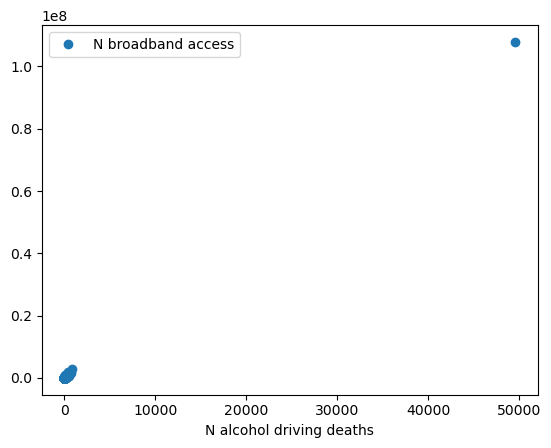

In [75]:
#there are outliers, so let's put a threshold value
#threshold_value = 10000
#filtered_df = df[df(['N alcohol driving deaths'] <= threshold_value) & (df['N broadband access'] <= threshold_value)]

plt.figure(figsize=(8,6)),
df.plot(x = 'N alcohol driving deaths', y = 'N broadband access', style = 'o')
plt.show()

In [72]:
df.head()

,State,County,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
0,Alabama,Alabama,7,26.5625,12.576985,9.79691,1.880878,0.956768,79.815668,7914,81.689511,2.0,1.0,1.0
1,Alabama,Autauga,18,32.1000,14.400000,12.60000,1.100000,1.600000,86.400000,18679,85.500000,2.0,2.0,2.0
2,Alabama,Baldwin,57,32.2000,12.200000,10.60000,1.300000,0.600000,81.400000,76602,87.900000,2.0,1.0,2.0
3,Alabama,Barbour,12,37.5000,16.200000,13.50000,3.900000,0.600000,83.100000,5872,64.600000,2.0,2.0,1.0
4,Alabama,Bibb,6,21.4000,11.300000,8.00000,1.200000,2.200000,87.000000,5284,74.600000,1.0,1.0,1.0


In [73]:
df.describe()

,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3194.000000,3194.000000,3194.000000,3194.000000
mean,31.221039,27.462870,13.043651,20.198488,4.787316,2.426973,78.589993,6.768455e+04,80.559775,1.491547,1.486850,1.491860
std,877.857947,14.963548,4.330938,566.173773,134.410981,68.144388,7.588230,1.911391e+06,7.825209,0.588083,0.499905,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.835840,2.500000e+01,37.037037,0.000000,1.000000,1.000000
25%,3.000000,18.670551,10.424217,7.982586,1.248498,0.635048,76.151439,3.218250e+03,76.563069,1.000000,1.000000,1.000000
50%,7.000000,26.562500,12.576985,9.796910,1.880878,0.956768,79.815668,7.914000e+03,81.689511,2.000000,1.000000,1.000000
75%,15.000000,33.798059,14.887912,11.987612,2.838251,1.434335,82.957062,2.127325e+04,85.785570,2.000000,2.000000,2.000000
max,49587.000000,100.000000,67.826087,32007.213630,7597.540339,3851.348901,98.437500,1.078904e+08,97.590361,2.000000,2.000000,2.000000


In [78]:
target_number = df['N broadband access'].max()
target_number

107890426

In [79]:
columnReplace = 'N broadband access'
newValue = df['N broadband access'].median()

df[columnReplace] = df[columnReplace].replace(target_number, newValue)

In [81]:
df.describe()

,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3194.000000,3194.000000,3194.000000,3194.000000
mean,31.221039,27.462870,13.043651,20.198488,4.787316,2.426973,78.589993,3.390794e+04,80.559775,1.491547,1.486850,1.491860
std,877.857947,14.963548,4.330938,566.173773,134.410981,68.144388,7.588230,1.061375e+05,7.825209,0.588083,0.499905,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.835840,2.500000e+01,37.037037,0.000000,1.000000,1.000000
25%,3.000000,18.670551,10.424217,7.982586,1.248498,0.635048,76.151439,3.218250e+03,76.563069,1.000000,1.000000,1.000000
50%,7.000000,26.562500,12.576985,9.796910,1.880878,0.956768,79.815668,7.914000e+03,81.689511,2.000000,1.000000,1.000000
75%,15.000000,33.798059,14.887912,11.987612,2.838251,1.434335,82.957062,2.126425e+04,85.785570,2.000000,2.000000,2.000000
max,49587.000000,100.000000,67.826087,32007.213630,7597.540339,3851.348901,98.437500,2.971249e+06,97.590361,2.000000,2.000000,2.000000


In [82]:
df['N broadband access'].max()

2971249

In [83]:
target_number2 = df['N alcohol driving deaths'].max()
target_number2
columnReplace2 = 'N alcohol driving deaths'
newValue2 = df['N alcohol driving deaths'].median()

df[columnReplace2] = df[columnReplace2].replace(target_number2, newValue2)

In [84]:
df.describe()

,N alcohol driving deaths,R alcohol driving deaths,R housing problems,R cost burden,R overcrowding,R inadequate facilities,R drive alone,N broadband access,R broadband access,categorical alcohol deaths R,categorical housing R,categorical broadband access R
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3194.000000,3194.000000,3194.000000,3194.000000
mean,15.698184,27.462870,13.043651,20.198488,4.787316,2.426973,78.589993,3.390794e+04,80.559775,1.491547,1.486850,1.491860
std,35.798506,14.963548,4.330938,566.173773,134.410981,68.144388,7.588230,1.061375e+05,7.825209,0.588083,0.499905,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.835840,2.500000e+01,37.037037,0.000000,1.000000,1.000000
25%,3.000000,18.670551,10.424217,7.982586,1.248498,0.635048,76.151439,3.218250e+03,76.563069,1.000000,1.000000,1.000000
50%,7.000000,26.562500,12.576985,9.796910,1.880878,0.956768,79.815668,7.914000e+03,81.689511,2.000000,1.000000,1.000000
75%,15.000000,33.798059,14.887912,11.987612,2.838251,1.434335,82.957062,2.126425e+04,85.785570,2.000000,2.000000,2.000000
max,792.000000,100.000000,67.826087,32007.213630,7597.540339,3851.348901,98.437500,2.971249e+06,97.590361,2.000000,2.000000,2.000000


<Figure size 800x600 with 0 Axes>

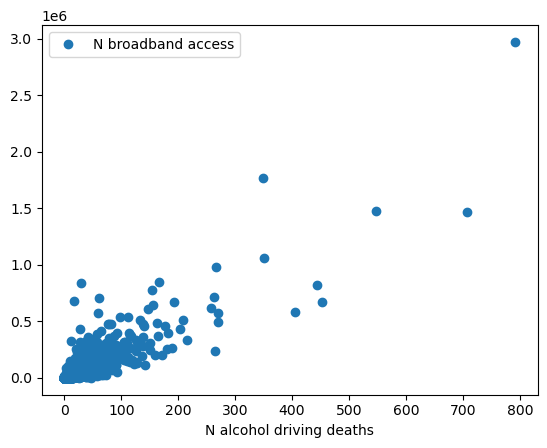

In [85]:
#there are outliers, so let's put a threshold value
#threshold_value = 10000
#filtered_df = df[df(['N alcohol driving deaths'] <= threshold_value) & (df['N broadband access'] <= threshold_value)]

plt.figure(figsize=(8,6)),
df.plot(x = 'N alcohol driving deaths', y = 'N broadband access', style = 'o')
plt.show()

In [86]:
x = df['N alcohol driving deaths'].values.reshape(-1,1)
y = df['N broadband access'].values.reshape(-1,1)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Regression

In [88]:
regression = LinearRegression()

In [89]:
regression.fit(x_train, y_train)

LinearRegression()

In [91]:
y_predicted = regression.predict(x_test)

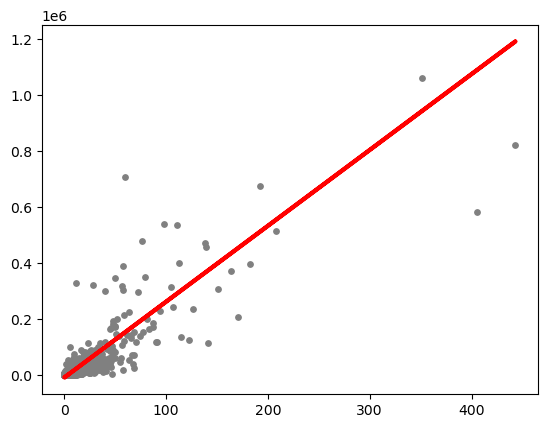

In [92]:
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s=15)
plot_test.plot(x_test, y_predicted, color='red', linewidth = 3)
plot_test.show()

In [93]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [94]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2704.55558382]]
Mean squared error:  2157101234.6248703
R2 score:  0.6943914548365746


In [126]:
df.to_csv(os.path.join(mainPath, mainPath, 'Achievement 6', '6.4 Cleaned Sourcing Data_deBeus.csv'))